**César Antonio Hoyos Peláez - 1007328843**

**Física Estadística - Miniproyecto # 2**

**Semestre 2023-2**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from scipy.optimize import root_scalar


Gran parte del desarrollo de este trabajo fue con el fin de replicar y extender los desarrollos realizados en el artículo: Miranda, E. N. (2019). Where are the particles when the box is hot?. European Journal of Physics, 40(6), 065401.

Si $P(X,t)$ representa la densidad de probabilidad de una partícula, está puede ser escrita en términos de la módulo de la función de onda, así:

\begin{equation}
  P(X,t) = |\psi(X,t)|^2
\end{equation}

Si se considera una partícula de masa $m$ en un pozo de potencial infinito de ancho $L$. Desde la mecánica cuántica, se tiene que la solución exacta a la Ec. de Schröndinger es:

\begin{equation}
  \psi_n(X,t) = \phi_n(X,t) exp(- i \frac{2\pi E_n t}{\hbar})
\end{equation}

Donde $n$ indica el autoestado del sistema (nivel de energía). Este autoestado es caracterizado por una energía $E_n$ y una función de onda dada por $\phi_n(x)$, los cuales vienen dados por:

\begin{align}
  E_n = \frac{h^2 n ^2}{8 m L^2}  \tag{1}
\end{align}


\begin{align}
  \phi_n(X) = \sqrt\frac{2}{L} sin(\frac{n \pi}{L} X) \tag{2}
\end{align}

Con base en esto, entonces la función de onda de una partícula libre es:

\begin{align}
  \psi_n(X,t) = \sqrt\frac{2}{L} sin(\frac{n \pi}{L} X) exp(- i \frac{2\pi E_n t}{\hbar})\tag{3}
\end{align}

Ahora, reemplazando la Ec. (3) para calcular la densidad de probabilidad, es fácil mostrar que la dependencia del tiempo se pierde, y por tanto se obtiene:

\begin{align}
  P_n(X) = \frac{2}{L} [sin(\frac{n \pi}{L} X)]^2 \tag{4}
\end{align}

Para obtener un detalle más profundo sobre los desarrollos realizados anteriormente, visitar la referencia [1].

Por otro lado, cuando se tiene el sistema de un pozo de potencial infinito en contacto con un reservorio térmico a temperatura $T$. Se puede modelar esta condición bajo el ensamble canónico. Como se vio en clase, para el caso del oscilador armónico desde la "Quantm Statical Mechanics". La probabilidad de encontrar una partícula en una posición independiente del nivel en que se encuentre es:

\begin{align}
  P_{th}(X,T) = \frac{\sum_{n=1}^{\infty} P_n(X) exp(- \frac{E_n}{K_B T })}{\sum_{n=1}^{\infty} exp(- \frac{E_n}{K_B T})} \tag{5}
\end{align}

Reemplazando las Ec's (1) y (4) en (5) se encuentra que:

\begin{align}
  P_{th}(X,T) = \frac{\sum_{n=1}^{\infty} \frac{2}{L} [sin(\frac{n \pi}{L} X)]^2 exp(- \frac{h^2 n^2}{8mL^2 K_B T})}{\sum_{n=1}^{\infty} exp(- \frac{h^2 n^2}{8mL^2 K_B T})} \tag{6}
\end{align}

Con el fin de simplicar la notación, se introduce una coordenada espacial adimensional $x$ y una temperatura adimensional $t$.

\begin{align}
  T = t \frac{h^2}{8mL^2K_B} \tag{7}
\end{align}

\begin{align}
  X = x \frac{L}{\pi} \tag{8}
\end{align}

Verifiquemos que realmente son adimensionales. Para esto recordemos las unidades:



*   $T [=] K $
*   $h [=] J s$ $\rightarrow $ $h^2 [=] J^2 s^2$
*   $m [=] kg$
*   $L [=] m$ $\rightarrow$ $L^2 [=] m^2$
*   $K_B [=] J/K$
*   $J [=] kg m^2 / s^2$

Así, para la temperatura adimensional tenemos:

$$K = t \frac{J^2 s^2}{kg m^2 J/K} = t \frac{J^2 s^2 K}{kg m^2 J} \rightarrow 1 = t \frac{Js^2}{kg m^2} = t J/J$$

Para demostrar que x es adimensional es fácil, por lo tanto se omite este cálculo. Por otro lado, si se observa la Ec. (8) bajo ese cambio de variable, los valores de la variable $x$ se ven modificados y por tanto la longitud de la caja.

*   Si $x →0 $ → $X → 0$
*   Si $x → \pi$ → $X → L$

Por tanto al reemplazar la Ec.(8) en la Ec.(2) se tiene:

\begin{align}
  \phi_n (x) = \sqrt\frac{2}{\pi} sin(nx) \tag{9}
\end{align}

Es fácil probar, que el cambio en la amplitud de la función de onda sigue estando normalizado, es decir, probar que:

$$\int_{0}^{\pi} \frac{2}{\pi} sin^2(nx) dx = 1$$

Así mismo, para cambiar la definición del factor de Boltzmann, teniendo en cuenta la Ec. (1) y la Ec. (7) se tiene:  

\begin{align}
  exp(- \frac{E_n}{K_B T}) = exp(- \frac{h^2 n^2}{8mL^2K_B} \frac{8mL^2K_B}{t h^2}) = exp(- \frac{n^2}{t}) \tag{10}
\end{align}

Si se introducen las Ecuaciones (9) y (10) en la Ec. (5) se encuentra:


\begin{equation}
\boxed{
P_{th}(x, t) = \frac{2}{\pi}\frac{\sum_{n=1}^{\infty} (sin(nx))^2 exp (- \frac{n^2}{t})}{\sum_{n=1}^{\infty} exp(- \frac{n^2}{t})}}
\end{equation}




In [ ]:
def Pth1(xmin, xmax, nmax, t, muestreo):
  """
  Calculo de la densidad de probabilidad de encontrar una particula de masa
  m en un pozo de pontencial infinito de ancho L en contacto con un reservorio
  térmico de temperatura T,

    Inputs:
      xmin: valor de longitud minima de la caja
      xmax: valor de longitud maximo de la caja
      nmax: numero de iteraciones
      t: temperatura adimensional
      muestreo: cantidad de muestras o pasos a realizar

    Outputs:
      x: array con las posiciones
      Pth: densidad de probabilidad en relacion a la posicion de la particula



  """
  x = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion
  Pth = np.zeros(len(x)) # Un arreglo de ceros donde se anexa la densidad de probabilidad
  k = 0 # Inicializa contador
  for i in x: # Se recorre cada valor de posicion con el indice i
    sum_up = 0 # Se inicializa una variable que va a ir sumando el término superior
    sum_down = 0 # Se inicializa una variable que va a ir sumando el término inferior
    for j in range(1, nmax): # Se recorre la suma en n
      val_up = (2/np.pi) * (np.sin(j*i))**2 * np.exp(- j**2/t) # Se calcula el termino superior
      val_down = np.exp(- j**2 / t) # Se calcula el termino inferior
      # Se van actualizando los valores
      sum_up += val_up
      sum_down += val_down

    Pth[k] = sum_up / sum_down # Se calcula la densidad de probabilidad
    k += 1

  return x, Pth # Retorna las posiciones en x y la densidad de probabilidad

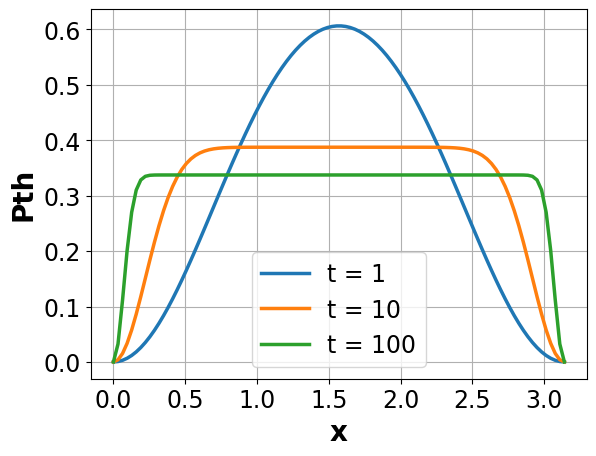

In [ ]:
t = [1, 10, 100] # Arreglo de temperaturas adimensionales
for i in t: # Se recorre el arreglo
  a = Pth1(0, np.pi, 50, i, 100) # Se calcula la densidad de probabilidad para cada t
  plt.plot(a[0], a[1], label = f't = {i}', linewidth=2.5) # Se grafica

# Graficacion

plt.xlabel('x', fontsize=20, fontweight='bold')
plt.ylabel('Pth', fontsize=20, fontweight='bold')
plt.xticks(fontsize=17) # Tamaño más grande para xticks
plt.yticks(fontsize=17) # Tamaño más grande para yticks
plt.grid()
plt.legend(fontsize=17)

# Guardar la figura
# plt.savefig('img1.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

Esta figura representa la densidad de probabilidad evaluada para tres temperaturas diferentes. Se puede observar que para una temperatura pequeña $t = 1$ el lugar con mayor probabilidad de encontrar la partícula es el centro de la caja. Pero, a medida que se aumenta la temperatura el lugar con mayor porbabilidad se vuelve más uniforme. Con temperaturas muy altas, cada vez se hace más dificíl encontrar el lugar donde es más probable que este la partícula.

In [ ]:
# Funcion de distribucion de probabilidad termalizada
def Pth(x, t, nmax):

  """
    Por facilidad, se implementa la distribucion de probabilidad termalizada
    pero para una sola posicion.

    Inputs:
      x: posicion
      t: temperatura
      nmax: niveles

    Output:
      pth: densidad de probabilidad normalizada

  """
  sum_up = 0
  sum_down = 0
  for n in range(1, nmax+1):
      up = np.exp(-n**2/t) * np.sin(n*x)**2
      down = np.exp(-n**2/t)
      sum_up += up
      sum_down += down

  Pth = 2/np.pi * sum_up/sum_down

  return Pth

# Función auxiliar para calcular la diferencia entre Pth y el objetivo 0.1
def Pth_diff(x, t, nmax, target=0.1):
    return Pth(x, t, nmax) - target

# Función para encontrar los valores de x donde Pth(x, t, nmax) = 0.1
def find_x_for_Pth(t, nmax, target=0.1):
    # Suponemos que hay varias raíces en el intervalo (0, π)
    roots = []
    x_values = np.linspace(0, np.pi, 100)
    # Buscamos raíces en pequeños intervalos dentro del rango completo
    for i in range(len(x_values)-1):
        x0 = x_values[i]
        x1 = x_values[i+1]
        # Chequeamos cambio de signo
        if Pth_diff(x0, t, nmax, target) * Pth_diff(x1, t, nmax, target) < 0:
            # Hay una raíz en el intervalo [x0, x1]
            result = root_scalar(Pth_diff, args=(t, nmax, target), bracket=[x0, x1])
            if result.converged:
                roots.append(result.root)
    return roots


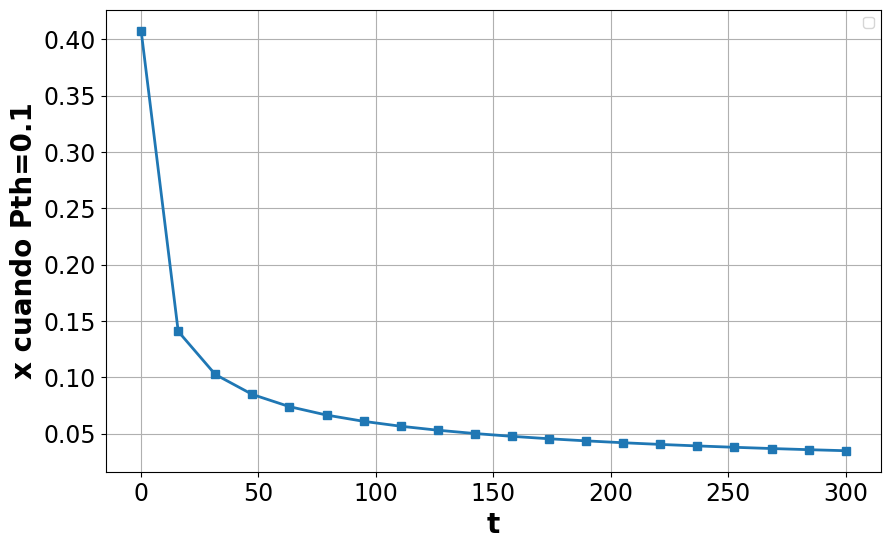

In [ ]:
# Fijamos nmax a 100
nmax_fixed = 100

# Creamos un rango de valores para t
t_values = np.linspace(0.1, 300, 20)  # Evitamos t=0 ya que podría causar divisiones por cero

# Inicializamos una lista para almacenar el primer valor de x para cada t
first_x_values = []

# Calculamos el primer valor de x para cada t
for t in t_values:
    roots = find_x_for_Pth(t, nmax_fixed)
    if roots:  # Si hay al menos una raíz, almacenamos la primera
        first_x_values.append(roots[0])
    else:
        first_x_values.append(None)  # Si no hay raíces, almacenamos None

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(t_values, first_x_values,'-s', linewidth=2)
plt.xlabel('t', fontsize=20, fontweight='bold')
plt.ylabel('x cuando Pth=0.1', fontsize=20, fontweight='bold')
plt.xticks(fontsize=17) # Tamaño más grande para xticks
plt.yticks(fontsize=17) # Tamaño más grande para yticks
plt.legend()
plt.grid()
#plt.savefig('img2.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

**Acá me falta algo.**

## Dos partículas sin espín.

Ahora analicemos el mismo problema pero considerando dos partículas no interactuantes sin espín en una caja. En este caso, solo se hace el estudio para partículas indistinguibles (Bosones y Fermiones).

En el caso de **bosones**, tenemos partículas con espín entero (en este caso no se considera) y la función de onda es simétrica, lo que los hace exentos de exlusión (no hay restricción de ocupación del mismo nivel de energía). La función de onda espacial para este caso se puede escribir como:

\begin{align}
\psi_{n_1, n_2}^b (x_1, x_2) = \frac{1}{\sqrt 2}[\phi_{n_1}(x_1) \phi_{n_2}(x_2) + \phi_{n_1}(x_2) \phi_{n_2}(x_1)]
\end{align}

Recordando la Ec. (9), e introduciendo esta en la ecuación anterior se obtiene:

\begin{align*}
 \psi_{n_1, n_2}^b (x_1, x_2) &= \frac{1}{\sqrt 2}[\frac{2}{\pi} sin(n_1 x_1) sin(n_2x_2) + \frac{2}{\pi} sin(n_1x_2) sin(n_2x_1)] \\
&= \frac{\sqrt 2}{\pi} [sin(n_1 x_1) sin(n_2x_2) + sin(n_1x_2) sin(n_2x_1)]
\end{align*}

Así, al tomar el módulo la densidad de probabilidad de encontrar dos bosones en posiciones $x_1$ y $x_2$ en niveles de energía $n_1$ y $n_2$ es:

\begin{equation}
\boxed{
P_{n_1, n_2}^b (x_1, x_2) = \frac{2}{\pi^2} [sin(n_1x_1)sin(n_2x_2) + sin(n_1x_2)sin(n_2x_1)]^2}
\end{equation}

Por otro lado, en el caso de **fermiones**, tenemos partículas con espín semi-impar (acá no se considera el tratamiento con espín), la función de onda debe ser antisimétrica bajo intercambio de partículas y además deben cumplir el principio de exclusión de Pauli, es decir, dos partículas no pueden estar en el mismo estado cuántico. La función de onda se escribe como:

\begin{align}
\psi_{n_1, n_2}^f (x_1, x_2) = \frac{1}{\sqrt 2}[\phi_{n_1}(x_1) \phi_{n_2}(x_2) - \phi_{n_1}(x_2) \phi_{n_2}(x_1)]
\end{align}

Recordando la Ec. (9) e introduciendo está en la expresión anterior, se tiene que:

\begin{align*}
 \psi_{n_1, n_2}^f (x_1, x_2) &= \frac{1}{\sqrt 2}[\frac{2}{\pi} sin(n_1 x_1) sin(n_2x_2) - \frac{2}{\pi} sin(n_1x_2) sin(n_2x_1)] \\
&= \frac{\sqrt 2}{\pi} [sin(n_1 x_1) sin(n_2x_2) - sin(n_1x_2) sin(n_2x_1)]
\end{align*}

Así, tomando el módulo de la expresión anterior se tienen que la densidad de probabilidad para encontrar dos fermiones en posiciones $x_1$ y $x_2$ en niveles de energía $n_1$ y $n_2$ respectivamente, es:

\begin{equation}
\boxed{
P_{n_1, n_2}^f (x_1, x_2) = \frac{2}{\pi^2} [sin(n_1x_1)sin(n_2x_2) - sin(n_1x_2)sin(n_2x_1)]^2}
\end{equation}

Ahora, se procede a implementar las densidades de probabilidad de forma computacional.

In [ ]:
def P_bosones(xmin, xmax, n1, n2, muestreo):
  """
  Calcula la densidad de probabilidad de encontrar dos bosones en niveles de energia
  n1 y n2, respectivamente. Los valores xmin y xmax determinan el ancho de la caja.

  Inputs:
    xmin: valor de longitud minima de la caja
    xmax: valor de longitud maximo de la caja
    n1: nivel de energia del boson 1
    n2: nivel de energia del boson 2
    muestreo: cantidad de muestras o pasos a realizar
  """

  x1 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion
  x2 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion


  Pth = np.zeros((len(x1), len(x2)))
  # Se recorre los dos arreglos de las posiciones
  for k1, i in enumerate(x1):
    for k2, j in enumerate(x2):
      Pth[k1, k2] = (2 / np.pi**2) * (np.sin(n1*i) * np.sin(n2*j) + np.sin(n1*j) * np.sin(n2*i))**2

  x1, x2 = np.meshgrid(x1, x2)

  # Crear una figura 3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # Graficar la superficie 3D
  ax.plot_surface(x1, x2, Pth, cmap='YlOrRd')

  # Etiquetas de los ejes
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('Pth', labelpad = -30)

  # Título
  ax.set_title(f'Pth Bosones con niveles de energia n1 = {n1} y n2= {n2} ')

  plt.show()


def P_fermiones(xmin, xmax, n1, n2, muestreo):
  """
  Calcula la densidad de probabilidad de encontrar dos fermiones en niveles de energia
  n1 y n2, respectivamente. Los valores xmin y xmax determinan el ancho de la caja.

  Inputs:
    xmin: valor de longitud minima de la caja
    xmax: valor de longitud maximo de la caja
    n1: nivel de energia del boson 1
    n2: nivel de energia del boson 2
    muestreo: cantidad de muestras o pasos a realizar
  """

  x1 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion
  x2 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion


  Pth = np.zeros((len(x1), len(x2)))
  # Se recorre los dos arreglos de las posiciones
  for k1, i in enumerate(x1):
    for k2, j in enumerate(x2):
      Pth[k1, k2] = (2 / np.pi**2) * (np.sin(n1*i) * np.sin(n2*j) - np.sin(n1*j) * np.sin(n2*i))**2

  x1, x2 = np.meshgrid(x1, x2)
  print(np.shape(Pth))
  # Crear una figura 3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # Graficar la superficie 3D
  ax.plot_surface(x1, x2, Pth, cmap='YlOrRd')

  # Etiquetas de los ejes
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('Pth', labelpad = -30)

  # Título
  ax.set_title(f'Pth Fermiones con niveles de energia n1 = {n1} y n2= {n2} ')

  plt.show()

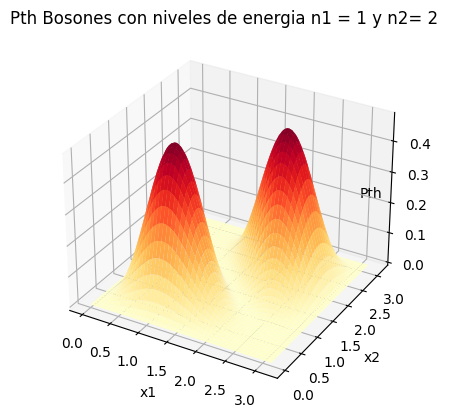

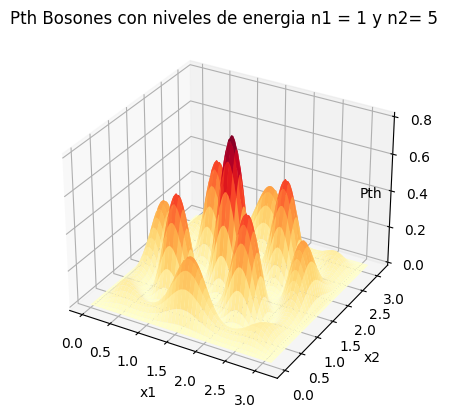

<Figure size 640x480 with 0 Axes>

In [ ]:
P_bosones(0, np.pi, 1, 2, 100)
P_bosones(0, np.pi, 1, 5, 100)

# Mostrar las dos gráficas una al lado de la otra
plt.subplots_adjust(wspace=0.5)  # Ajustar el espacio entre las gráficas
plt.show()

(100, 100)


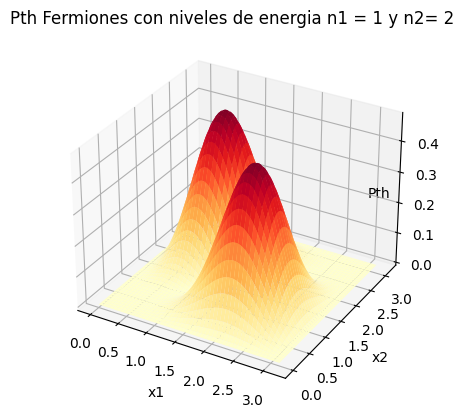

(100, 100)


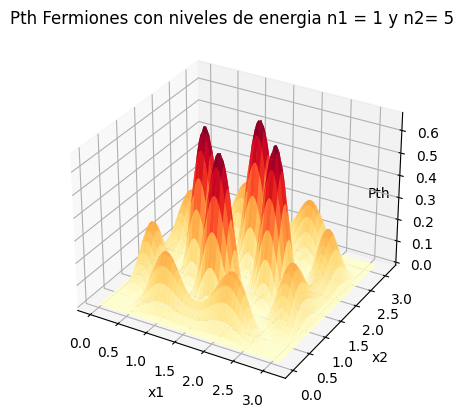

<Figure size 640x480 with 0 Axes>

In [ ]:
P_fermiones(0, np.pi, 1, 2, 100)
P_fermiones(0, np.pi, 1, 5, 100)

# Mostrar las dos gráficas una al lado de la otra
plt.subplots_adjust(wspace=0.5)  # Ajustar el espacio entre las gráficas
plt.show()

## Dos partículas sin espín en contacto con un reservorio térmico

Para calcular el efecto de la temperatura con dos bosones o fermiones inicialmente se puede pensar como:

\begin{align}
  P_{th}(x_1, x_2, t) = \frac{ \sum_{n_1=1}^{\infty} \sum_{n_2=1}^{\infty} P_{n_1, n_2} (x_1, x_2) exp(- \frac{E_{n_1, n_2}}{t}) }{\sum_{n_1=1}^{\infty} \sum_{n_2=1}^{\infty} exp(- \frac{E_{n_1, n_2}}{t}) }
\end{align}

El problema es que esta ecuación no se puede usar libremente debido a dos problemas:



1.   Se debe evitar añadir dos veces el mismo término, es decir, no se debe dejar de lado la indistinguibilidad de los bosones y fermiones.
2.   Se debe recordar que dos fermiones no pueden ocupar el mismo nivel de energía.

Analicemos primero el caso de los **Bosones**. Para esto planteemos la suma como la propone el artículo:

\begin{equation}
  P_{th}^b(x_1, x_2, t) = \frac{ \sum_{n_1=1}^{n_{max}} \sum_{n_2=n_1}^{n_{max}} P_{n_1, n_2}^b (x_1, x_2) exp(- \frac{E_{n_1, n_2}}{t}) }{\sum_{n_1=1}^{n_{max}} \sum_{n_2=n_1}^{n_{max}} exp(- \frac{E_{n_1, n_2}}{t})}
\end{equation}

En clase vimos que para un sistema de $N$ partículas y degeneración fija $g$ la cantidad de microestados posibles en el caso de bosones era:

\begin{align}
 \Omega = \binom{g + N - 1}{N}
\end{align}

por tanto, si tomamos la degeneración como el número máximo de niveles bajo estudio, se tiene $g = n_{max}$

\begin{align}
 \Omega = \binom{n_{max} + N - 1}{N} \tag{11}
\end{align}

La suma que se propone en el artículo para la densidad de probabilidad para dos bosones cuando hay efecto de temperatura debe estar relacionada con la Ec. (11). Por ejemplificar tomemos el caso de $n_{max} = 3$. Por un lado:

\begin{equation}
  \sum_{n_1=1}^{3} \sum_{n_2=n_1}^{3} → (1,1), (1,2), (1,3), (2,2), (2,3), (3,3)
\end{equation}

Por otro lado, contando la cantidad de microestados posibles se tiene:

\begin{align}
 \Omega = \binom{3 + 2 - 1}{2} = \binom{4}{2} = \frac{4!}{2!(4-2)!} = \frac{4x3}{2} = 3x2 = 6
\end{align}

Así, la justificación de la suma para el caso de dos bosones sometidos a temperatura viene dada desde la Ec. (11).

Ahora para el caso de los **fermiones**, el artículo plantea la expresión:

\begin{equation}
  P_{th}^f(x_1, x_2, t) = \frac{ \sum_{n_1=1}^{n_{max} - 1} \sum_{n_2=n_1 + 1}^{n_{max}} P_{n_1, n_2}^f (x_1, x_2) exp(- \frac{E_{n_1, n_2}}{t}) }{\sum_{n_1=1}^{n_{max} - 1} \sum_{n_2=n_1 + 1}^{n_{max}} exp(- \frac{E_{n_1, n_2}}{t})}
\end{equation}

De manera similar, para justificar la suma, nos dirigimos a la cantidad de microestados posibles para el caso de los fermiones, así:

\begin{align}
  \Omega = \binom{g}{N}
\end{align}

Donde $g$ es la degeneración y $N$ el número de partículas. En este caso, tomamos la degeneración como el número de niveles máximo en el cual se pueden distribuir los fermiones, es decir, $g = n_{max}$.

\begin{align}
  \Omega = \binom{n_{max}}{N} \tag{12}
\end{align}

La suma que se propone en el artículo para la densidad de probabilidad para dos fermiones cuando hay efecto de temperatura debe estar relacionada con la Ec. (12). Por ejemplificar tomemos el caso de $n_{max} = 3$. Por un lado:

\begin{equation}
  \sum_{n_1=1}^{2} \sum_{n_2=n_1 + 1}^{3} → (1,2), (1,3), (2,3)
\end{equation}

Por otro lado, contando la cantidad de microestados posibles se tiene:

\begin{align}
 \Omega = \binom{3}{2} = \frac{3!}{2! (3 - 2)!} = \frac{3x2!}{2!} = 3
\end{align}

Así, la justificación de la suma para el caso de dos fermiones sometidos a temperatura viene dada desde la Ec. (12).

Ahora reemplacemos la densidad de probabilidad y obtengamos las ecuaciones que se deben implementar computacionalmente. Cabe aclarar que ambos casos (bosones y fermiones) no se considera interación entre las dos partículas, por ende la energía viene dada por $E_{n_1, n_2} = n_1^2 + n_2^2$.

\begin{equation}
\boxed{
  P_{th}^b(x_1, x_2, t) = \frac{2}{\pi^2} \frac{ \sum_{n_1 =  1}^{n_{max}} \sum_{n_2 = n_1}^{n_{max}} [sin(n_1x_1)sin(n_2x_2) + sin(n_1x_2)sin(n_2x_1)]^2 exp(- \frac{n_1^2 + n_2^2}{t}) }{\sum_{n_1 =  1}^{n_{max}} \sum_{n_2 = n_1}^{n_{max}} exp(- \frac{n_1^2 + n_2^2}{t})}}
\end{equation}


\begin{equation}
\boxed{
  P_{th}^f(x_1, x_2, t) = \frac{2}{\pi^2} \frac{ \sum_{n_1 =  1}^{n_{max} - 1} \sum_{n_2 = n_1 + 1}^{n_{max}} [sin(n_1x_1)sin(n_2x_2) - sin(n_1x_2)sin(n_2x_1)]^2 exp(- \frac{n_1^2 + n_2^2}{t}) }{\sum_{n_1 =  1}^{n_{max} -1} \sum_{n_2 = n_1 + 1}^{n_{max}} exp(- \frac{n_1^2 + n_2^2}{t})}}
\end{equation}





In [ ]:
def Pth_bosones(nmax, xmin, xmax, muestreo, t):
  """
  Calcula la densidad de probabilidad de encontrar dos bosones en un pozo
  de potencial infinito en contacto con un reservorio termico.

  Inputs:
    nmax: numero de niveles de energia
    xmin: valor de longitud minima de la caja
    xmax: valor de longitud maximo de la caja
    muestreo: cantidad de muestras o pasos a realizar.
    t: temperatura adimensional.
  """
  x1 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion
  x2 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion
  Pth = np.zeros((len(x1), len(x2))) # se crea un arreglo vacio

  for k1, i1 in enumerate(x1): # recorre las posiciones de x1

    for k2, i2 in enumerate(x2): # recorre las posiciones de x2

      sum_up = 0
      sum_down = 0

      for n1 in range(1, nmax + 1): # primer suma, va hasta nmax porque el objeto range ya resta 1

        for n2 in range(n1, nmax + 1): # segunda suma, arranca desde n1 y va hasta nmax +1 por el objeto range resta 1

          up = (np.sin(n1 * i1) * np.sin(n2 * i2) + np.sin(n1 * i2) * np.sin(n2 * i1))**2 * np.exp(- (n1**2 + n2**2)/t)
          down  = np.exp(- (n1**2 + n2**2)/t)

          sum_up += up
          sum_down += down

      Pth[k1, k2] = 2/(np.pi ** 2) * sum_up/sum_down

  x1, x2 = np.meshgrid(x1, x2)

  fig = go.Figure(data=[go.Surface(z=Pth, x=x1, y=x2, colorscale='YlOrRd')])

  # Actualizar el layout de la figura
  fig.update_layout(title='Densidad de probabilidad de bosones en contacto con reservorio termico', autosize=False,
                    width=700, height=700,
                    margin=dict(l=65, r=50, b=65, t=90))

  # Mostrar la figura
  fig.show()



def Pth_fermiones(nmax, xmin, xmax, muestreo, t):
  """
  Calcula la densidad de probabilidad de encontrar dos fermiones en un pozo
  de potencial infinito en contacto con un reservorio termico.

  Inputs:
    nmax: numero de niveles de energia
    xmin: valor de longitud minima de la caja
    xmax: valor de longitud maximo de la caja
    muestreo: cantidad de muestras o pasos a realizar.
    t: temperatura adimensional.
  """
  x1 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion
  x2 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion
  Pth = np.zeros((len(x1), len(x2))) # se crea un arreglo vacio

  for k1, i1 in enumerate(x1): # recorre las posiciones de x1

    for k2, i2 in enumerate(x2): # recorre las posiciones de x2

      sum_up = 0
      sum_down = 0

      for n1 in range(1, nmax): # primer suma, va hasta nmax porque el objeto range ya resta 1

        for n2 in range(n1+1, nmax + 1): # segunda suma, arranca desde n1 y va hasta nmax +1 por el objeto range resta 1

          up = (np.sin(n1 * i1) * np.sin(n2 * i2) - np.sin(n1 * i2) * np.sin(n2 * i1))**2 * np.exp(- (n1**2 + n2**2)/t)
          down  = np.exp(- (n1**2 + n2**2)/t)

          sum_up += up
          sum_down += down

      Pth[k1, k2] = 2/(np.pi ** 2) * sum_up/sum_down

  x1, x2 = np.meshgrid(x1, x2)

  fig = go.Figure(data=[go.Surface(z=Pth, x=x1, y=x2, colorscale='YlOrRd')])

  # Actualizar el layout de la figura
  fig.update_layout(title='Densidad de probabilidad de fermiones en contacto con reservorio térmico', autosize=False,
                    width=700, height=700,
                    margin=dict(l=65, r=50, b=65, t=90))

  # Mostrar la figura
  fig.show()


In [ ]:
Pth_bosones(25, 0, np.pi, 100, 10)

In [ ]:
Pth_fermiones(25, 0, np.pi, 100, 10)

## Dos partículas con espín (Fermiones):

La función de onda total de los fermiones debe ser antisimétrica y tener dos componentes, una referente a variables espaciales y la otra referente a los espínes. Se denota:



*   $\chi_+(1)$: primera partícula con espín arriba.
*   $\chi_-(2)$: segunda partícula con espín abajo.

Si se tiene un fermión en un nivel $n_1$ y otro en un nivel $n_2$. Se pueden dar los siguientes casos:




1.   La función de onda espacial sea simétrica. Por tanto:

\begin{align}
  \psi_{n_1, n_2}^f = \frac{1}{\sqrt 2}[\phi_{n_1}(x_1)\phi_{n_2}(x_2) + \phi_{n_1}(x_2)\phi_{n_2}(x_1)] \frac{1}{\sqrt 2} [\chi_{+}(1) \chi_-(2) - \chi_+(2)\chi_-(1)] \tag{13}
\end{align}

Si la función de onda espacial es simétrica, entonces la función de onda asociada con el espín debe ser antisimétrica. Este estado se dice que es un singlete de espín (representado por la Ec. (13)).
2.   Función de onda espacial antisimétrica. Por tanto:

\begin{align}
  \psi_{n_1, n_2}^f = \frac{1}{\sqrt 2}[\phi_{n_1}(x_1)\phi_{n_2}(x_2) - \phi_{n_1}(x_2)\phi_{n_2}(x_1)] \frac{1}{\sqrt 2} [\chi_{+}(1) \chi_-(2) + \chi_+(2)\chi_-(1)] \tag{14}
\end{align}

\begin{align}
  \psi_{n_1, n_2}^f = \frac{1}{\sqrt 2}[\phi_{n_1}(x_1)\phi_{n_2}(x_2) - \phi_{n_1}(x_2)\phi_{n_2}(x_1)] [\chi_{+}(1) \chi_+(2) ] \tag{16}
\end{align}

\begin{align}
  \psi_{n_1, n_2}^f = \frac{1}{\sqrt 2}[\phi_{n_1}(x_1)\phi_{n_2}(x_2) - \phi_{n_1}(x_2)\phi_{n_2}(x_1)] [\chi_{-}(1) \chi_{-}(2) ] \tag{17}
\end{align}

Si la función de onda espacial es antisimétrica, entonces hay tres formas diferentes de expresar la parte de espín y las 3 son simétricas bajo el intercambio de partículas. La antisimetría de la función espacial de onda se dice que está asociada con un triplete de espín.

Para calcular la densidad de probabilidad de encontrar una partícula en $x_1$ y otra en $x_2$ independiente de su espín viene dado por:


\begin{equation}
  \boxed{
  P_{n_1, n_2}(x_1, x_2) = \frac{1}{4} (\frac{1}{2}[\phi_{n_1}(x_1) \phi_{n_2}(x_2) + \phi_{n_1}(x_2)\phi_{n_2}(x_1)]^2) + \frac{3}{4}(\frac{1}{2} [\phi_{n_1}(x_1)\phi_{n_2}(x_2) - \phi_{n_1}(x_2)\phi_{n_2}(x_1)]^2)}
\end{equation}









In [ ]:
def P_fermiones_spin(xmin, xmax, n1, n2, muestreo):
  """
  Calcula la densidad de probabilidad de encontrar dos fermiones en niveles de energia
  n1 y n2 independiente del espin, respectivamente. Los valores xmin y xmax determinan el ancho de la caja.

  Inputs:
    xmin: valor de longitud minima de la caja
    xmax: valor de longitud maximo de la caja
    n1: nivel de energia del boson 1
    n2: nivel de energia del boson 2
    muestreo: cantidad de muestras o pasos a realizar
  """

  x1 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion
  x2 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion


  Pth = np.zeros((len(x1), len(x2)))
  # Se recorre los dos arreglos de las posiciones
  for k1, i in enumerate(x1):
    for k2, j in enumerate(x2):
      val1 = 2 / (np.pi**2) * (np.sin(n1 * i) * np.sin(n2 *j) + np.sin(n1* j) * np.sin(n2 * i))**2
      val2 = 2 / (np.pi**2) * (np.sin(n1 * i) * np.sin(n2 *j) - np.sin(n1* j) * np.sin(n2 * i))**2
      Pth[k1, k2] = 1/4 * val1 + 3/4 * val2

  x1, x2 = np.meshgrid(x1, x2)

  fig = go.Figure(data=[go.Surface(z=Pth, x=x1, y=x2, colorscale='YlOrRd')])

  # Actualizar el layout de la figura
  fig.update_layout(title='Densidad de probabilidad de fermiones independiende de su espín', autosize=False,
                    width=700, height=700,
                    margin=dict(l=65, r=50, b=65, t=90))



  # Mostrar la figura
  fig.show()

In [ ]:
P_fermiones_spin(0, np.pi, 1, 2, 100)

In [ ]:
P_fermiones_spin(0, np.pi, 1, 5, 100)

Por otro lado, la densidad de fermiones con espín conectados a un reservorio térmico, es fácil deducir que la fórmula tiene la forma:

\begin{align}
P_{n_1, n_2}(x_1, x_2) = \frac{1}{4} (\frac{1}{2}[\phi_{n_1}(x_1) \phi_{n_2}(x_2) + \phi_{n_1}(x_2)\phi_{n_2}(x_1)]^2) + \frac{3}{4}(\frac{1}{2} [\phi_{n_1}(x_1)\phi_{n_2}(x_2) - \phi_{n_1}(x_2)\phi_{n_2}(x_1)]^2) \tag{18}
\end{align}

En donde esta densidad de probabilidad, se introduce con el factor de boltzmann en el caso de los fermiones, es decir:

\begin{align}
P_{th}(x_1, x_2, t) = \frac{\sum_{n_1=1}^{n_{nmax}}P_{n_1, n_2}(x_1, x_2)}{1}
\end{align}

In [ ]:
def Pth_fermiones_spin(nmax, xmin, xmax, muestreo, t):
  """
  Calcula la densidad de probabilidad de encontrar dos bosones en un pozo
  de potencial infinito en contacto con un reservorio termico.

  Inputs:
    nmax: numero de niveles de energia
    xmin: valor de longitud minima de la caja
    xmax: valor de longitud maximo de la caja
    muestreo: cantidad de muestras o pasos a realizar.
    t: temperatura adimensional.
  """
  x1 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion
  x2 = np.linspace(xmin, xmax, muestreo) # Se crea un array de valores de posicion
  Pth = np.zeros((len(x1), len(x2))) # se crea un arreglo vacio

  for k1, i1 in enumerate(x1): # recorre las posiciones de x1

    for k2, i2 in enumerate(x2): # recorre las posiciones de x2

      sum_up = 0
      sum_down = 0

      for n1 in range(1, nmax + 1): # primer suma, va hasta nmax porque el objeto range ya resta 1

        for n2 in range(n1, nmax + 1): # segunda suma, arranca desde n1 y va hasta nmax +1 por el objeto range resta 1

          up = ( 1/4*( np.sin(n1 * i1) * np.sin(n2 * i2) + np.sin(n1 * i2) * np.sin(n2 * i1))**2 + 3/4*( np.sin(n1 * i1) * np.sin(n2 * i2) - np.sin(n1 * i2) * np.sin(n2 * i1))**2 )* np.exp(- (n1**2 + n2**2)/t)
          down  = np.exp(- (n1**2 + n2**2)/t)

          sum_up += up
          sum_down += down

      Pth[k1, k2] = 2/(np.pi ** 2) * sum_up/sum_down

  x1, x2 = np.meshgrid(x1, x2)

  fig = go.Figure(data=[go.Surface(z=Pth, x=x1, y=x2, colorscale='YlOrRd')])

  # Actualizar el layout de la figura
  fig.update_layout(title='Densidad de probabilidad de fermiones con espín en contacto con reservorio termico', autosize=False,
                    width=700, height=700,
                    margin=dict(l=65, r=50, b=65, t=90))

  # Mostrar la figura
  fig.show()

In [ ]:
Pth_fermiones_spin(25, 0, np.pi, 100, 10)

## Extras:

### Referencias

[1] Cohen-Tannoudji, C., Diu, B., & Laloe, F. (1986). Quantum Mechanics, Volume 1. Quantum Mechanics, 1, 898.

[2] Miranda, E. N. (2019). Where are the particles when the box is hot?. European Journal of Physics, 40(6), 065401.

[3] Galindo, A., & Pascual, P. (2012). Quantum Mechanics I. Springer Science & Business Media.